In [7]:
from ubi.device import Device
from sim.simulator import Simulator
from sim.writer import *
from ubi.wearleveling import *
import matplotlib.pyplot as plt

volumeSize = 8
d = Device(10, volumeSize)
simulator = Simulator(d)

#writer = WriteOneAddress(3)
writer = WriteRange(0, volumeSize-1)
#writer = WriteRandomAddress(3, 6)

#writer = WriteMultiple([WriteOneAddress(0),  WriteRange(2, 5),  WriteRandomAddress(5, volumeSize)])

wearleveler = ReplaceLowestEraseCount()

#simulator.run(writer, 100000)
simulator.runWithWearleveling(writer, wearleveler, 1000)

eraseCounts = d.eraseCountList()
sequenceCounts = d.sequenceCountList()

In [ ]:
d.print()
d.printAll()

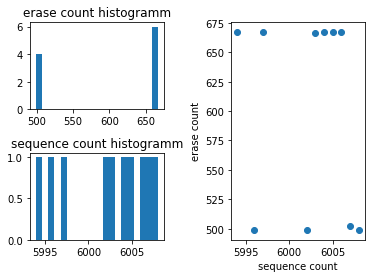

In [29]:
plt.subplot2grid((2,2), (0,0))
plt.hist(eraseCounts, 20)
plt.title('erase count histogramm')

plt.subplot2grid((2,2), (1,0))
plt.hist(sequenceCounts, 20)
plt.title('sequence count histogramm')

plt.subplot2grid((2,2), (0,1), rowspan=2)
plt.scatter(sequenceCounts, eraseCounts)
plt.title('')
plt.xlabel('sequence count')
plt.ylabel('erase count')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()